In [33]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import ast
from scipy import sparse

In [34]:
from IPython.display import SVG
from sknetwork.embedding.force_atlas import ForceAtlas
from sknetwork.visualization import svg_graph

In [35]:
data = pd.read_csv('music_db.csv')

In [36]:
data.collabs

0      ['thomasalanng', 'rob1toad', 'dellguistovitch'...
1      ['themaxpope', 'jamessmithvocal', 'mayadelilah...
2                                       ['conor_albert']
3      ['livbedumb', 'casiomusicuk', 'conor_albert', ...
4      ['sammyraemusic', 'billieeilish', 'finneas', '...
                             ...                        
365                                      ['souperfruit']
366              ['djkhaled', 'blaze_jake_', 'hesh.dad']
367      ['fluxy25', 'gettucced', 'djkhaled', 'om42069']
368    ['tonystatovci', 'takeoverceo', 'pilsburykush'...
369                                                   []
Name: collabs, Length: 370, dtype: object

In [37]:
data.reset_index(level=0, inplace=True)

In [38]:
def convert_to_adjacency(data):
    L = []
    for i in range(len(data)):
        l = []
        for cand in (ast.literal_eval(data.collabs[i])):
            if cand in list(data.user_name):
                l.append(int(data[data['user_name'] == cand]['index']))
        L.append(l)
    return L

In [39]:
def convert_to_matrix(graph):
    matrix = []
    for i in range(len(graph)): 
        matrix.append([0]*len(graph))
        for j in graph[i]:
            matrix[i][j] = 1
    return matrix

In [40]:
adjacency = convert_to_matrix(convert_to_adjacency(data))
adjacency = sparse.csr_matrix(adjacency)
image = svg_graph(adjacency)
#SVG(image)

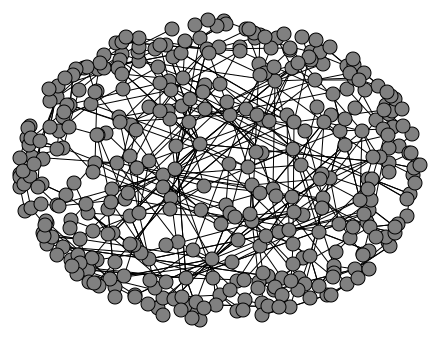

In [41]:
forceatlas2 = ForceAtlas()
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding)
SVG(image)

In [45]:
data_graph = convert_to_matrix(convert_to_adjacency(data))

In [47]:
data_graph = pd.DataFrame(data_graph)

In [48]:
data_graph.reset_index(level=0, inplace=True)

In [ ]:
data_graph.to_csv('data_graph.csv', index=False)